In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Function objective 

In [2]:
def f(x):
    return x ** 2

# Bilangan bulat antara 0 sampai 31

In [3]:
randomInt = []
for i in range(5):
    randomInt.append(random.randint(0, 31))

In [4]:
len(randomInt)

5

In [5]:
for i in randomInt:
    print("Random Integer: ", i)

Random Integer:  12
Random Integer:  28
Random Integer:  17
Random Integer:  14
Random Integer:  24


# -	Buatlah Populasi awal yang terdiri dari 5 kromosom (masing-masing kromosom adalah representasi biner dari bilangan bulat) dengan nilai acak antara 0 dan 31

In [6]:
def intToBinary(x):
    return bin(x).replace("0b", "").zfill(5)

In [7]:
def buatPopulasi(randomInt):
    populasi = []
    for i in randomInt:
        populasi.append(intToBinary(i))
    return populasi

In [8]:
populasi = buatPopulasi(randomInt)

In [9]:
print(populasi)

['01100', '11100', '10001', '01110', '11000']


# -	Hitung Fitness Setiap Kromosom dari fungsi objektif

In [10]:
def hitungFitness(populasi):
    fitness = []
    for i in range(len(populasi)):
        fitness.append(f(randomInt[i]))
    return fitness

In [11]:
print(hitungFitness(populasi))

[144, 784, 289, 196, 576]


In [12]:
for i in range(len(randomInt)):
    print("Fitness of chromossome: ", populasi[i], " = ", f(randomInt[i]))


Fitness of chromossome:  01100  =  144
Fitness of chromossome:  11100  =  784
Fitness of chromossome:  10001  =  289
Fitness of chromossome:  01110  =  196
Fitness of chromossome:  11000  =  576


In [13]:
fitness = hitungFitness(populasi)

In [14]:
print(fitness)

[144, 784, 289, 196, 576]


# -	Hitung Total Fitness Populasi

In [15]:
def hitungTotalFitness(fitness):
    return sum(fitness)

In [16]:
totalFitness = hitungTotalFitness(fitness)

In [17]:
print(totalFitness)

1989


# -	Hitung Peluang Seleksi Setiap Kromosom

In [18]:
def peluang(fitness, totalFitness):
    peluang = []
    for i in range(len(fitness)):
        peluang.append(fitness[i] / totalFitness)
    return peluang

In [19]:
peluang = peluang(fitness, totalFitness)

In [20]:
print(peluang)

[0.07239819004524888, 0.3941679235796883, 0.1452991452991453, 0.09854198089492207, 0.2895927601809955]


In [21]:
print(sum(peluang))

1.0


# -	Gunakan Roulette Wheel untuk menentukan 2 kromosom yang terpilih

In [22]:
def roadWheel(x):
    hasil = {}
    a = 0
    for i in range(len(x)):
        hasil["x"+str(i+1)] = [a, a+x[i]]
        a += x[i]
    return hasil

In [23]:
rouletteWheel = roadWheel(peluang)

In [24]:
rouletteWheel

{'x1': [0, 0.07239819004524888],
 'x2': [0.07239819004524888, 0.46656611362493716],
 'x3': [0.46656611362493716, 0.6118652589240825],
 'x4': [0.6118652589240825, 0.7104072398190046],
 'x5': [0.7104072398190046, 1.0]}

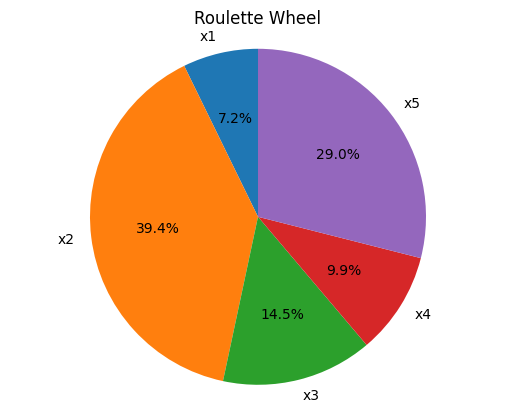

In [25]:
interval_lengths = [rouletteWheel[key][1] - rouletteWheel[key][0] for key in rouletteWheel]
labels = rouletteWheel.keys()
plt.pie(interval_lengths, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Roulette Wheel')
plt.axis('equal') 
plt.show()

# -	Lakukan proses crossover, dengan menggunakan single-point crossover (bebas titik point yang dipilih)

In [26]:
print(populasi)

['01100', '11100', '10001', '01110', '11000']


In [27]:
# untuk mengambil awal yang masih sama
print(populasi[1][:2])

11


In [28]:
# untuk mengambil akhir yang akan dicrossover
print(populasi[1][2:])

100


In [29]:
# def crossover(population):
#     new_population = []
#     for _ in range(len(population)):
#         parent1 = random.choice(population)
#         parent2 = random.choice(population)
#         random_point = random.randint(1, len(parent1) - 1)
#         child = parent1[:random_point] + parent2[random_point:]
#         new_population.append(child)

#     return new_population

In [30]:
print(populasi)

['01100', '11100', '10001', '01110', '11000']


In [31]:
def crossover(populasi):
    crossPopulasi = []
    for i in range(len(populasi)):
        parent1 = populasi[i]
        parent2 = populasi[(i + 1) % len(populasi)]
        # randomPointSingleCross = random.randint(1, len(parent1) - 1)
        randomPointSingleCross = 2
        child = parent1[:randomPointSingleCross] + parent2[randomPointSingleCross:]
        crossPopulasi.append(child)
    return crossPopulasi
crossPopulasi = crossover(populasi)

In [32]:
crossPopulasi

['01100', '11001', '10110', '01000', '11100']

# -	Lakukan proses mutasi, dengan menggunakan titik point yang acak

In [33]:
def mutasi(crossPopulasi):
    hasilMutasi = []
    for kromosom in crossPopulasi:
        # kromosom_length = len(kromosom)
        point1 = random.randint(0, len(kromosom) - 2)
        point2 = random.randint(point1 + 1, len(kromosom) - 1)
        print(point1, point2)
        
        kromosomBaru = ""
        for index in range(len(kromosom)):
            if index < point1 or index > point2:
                kromosomBaru += kromosom[index]
            else:
                if kromosom[index] == '1':
                    kromosomBaru += '0'
                else:
                    kromosomBaru += '1'
        
        hasilMutasi.append(kromosomBaru)
    
    return hasilMutasi


mutasi = mutasi(crossPopulasi)


1 3
3 4
1 2
0 1
3 4


In [34]:
print(crossPopulasi)

['01100', '11001', '10110', '01000', '11100']


In [35]:
mutasi

['00010', '11010', '11010', '10000', '11111']